In [19]:
import sys
import os
import gzip


from collections import defaultdict
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

In [5]:
vcf_file = "/home/hakan/mozart/projects/mice_cell_development/mouse-itp/snp/reference_files/transcriptomic_variants.vcf.gz"

In [2]:
#### VCF Class

VCF_FIELDS = ["CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER",  "INFO",    "FORMAT",  "CAST_EiJ"]

class VcfEntry:

    def __init__(self , vcf_line_contents ):
        assert len(vcf_line_contents) >= len(VCF_FIELDS)
        
        self.fields = { VCF_FIELDS[i] : vcf_line_contents[i] for i in range( len(VCF_FIELDS) ) }
        
        
    def __str__(self ):
        """
        This needs to be rewritten 
        """
        return "\t".join( [self.fields[f] for f in VCF_FIELDS] )


############################################################################
    
class VcfFile:
    '''
    This is a reader for 
    '''
    
    def __init__(self , file):
        myopen = open
        if file.endswith(".gz"):
            myopen = gzip.open

        if(file):
            self.f = myopen(file , "rt")
        else:
            self.f = stdin

    #####################################################

    def __enter__(self):
        return self

    #####################################################

    def __exit__(self, exc_type, exc_val, exc_tb):
        pass

    ######################################################

    def __getitem__(self, index):
        line = self.f.readline().strip()
        
        while line.startswith("#"):
            line = self.f.readline().strip()
        
        if line == "":
            raise IndexError
        #line_contents = line.split("\t")
        line_contents = line.split()
        if len(line_contents) < 9:
            raise IndexError
        return VcfEntry(line_contents)
                
    #########################################################

    def __del__(self):
        self.f.close()

In [6]:
myvcf = VcfFile(vcf_file)

In [10]:
snp_counts = defaultdict(int)

for v in myvcf:
    snp_counts[v.fields["CHROM"] ] += 1

Below is a sorted list of Transcripts with their number of SNPs.

In [15]:
dict(sorted( snp_counts.items(), reverse = True , key = lambda x: x[1] ) )

{'ENSMUST00000020488.8|ENSMUSG00000020255.8|OTTMUSG00000060613.1|OTTMUST00000148258.1|D10Wsu102e-201|D10Wsu102e|123179|UTR5:1-38|CDS:39-596|UTR3:597-123179|': 358,
 'ENSMUST00000099981.9|ENSMUSG00000051747.15|OTTMUSG00000013134.9|OTTMUST00000035892.2|Ttn-203|Ttn|107355|UTR5:1-131|CDS:132-106304|UTR3:106305-107355|': 301,
 'ENSMUST00000115104.9|ENSMUSG00000026131.20|OTTMUSG00000044431.15|-|Dst-203|Dst|23279|CDS:1-22221|UTR3:22222-23279|': 158,
 'ENSMUST00000215295.1|ENSMUSG00000096054.3|OTTMUSG00000063506.2|OTTMUST00000154809.1|Syne1-205|Syne1|27908|UTR5:1-418|CDS:419-26818|UTR3:26819-27908|': 140,
 'ENSMUST00000056623.12|ENSMUSG00000048108.13|OTTMUSG00000027031.2|OTTMUST00000066816.2|Tmem72-201|Tmem72|17152|UTR5:1-336|CDS:337-1164|UTR3:1165-17152|': 127,
 'ENSMUST00000180041.8|ENSMUSG00000033705.17|OTTMUSG00000015627.4|OTTMUST00000037134.3|Stard9-206|Stard9|15004|UTR5:1-103|CDS:104-13789|UTR3:13790-15004|': 121,
 'ENSMUST00000032157.8|ENSMUSG00000030074.9|OTTMUSG00000023979.3|OTTMUST00

In [24]:
len(snp_counts)

16260

In [17]:
max(snp_counts.values())

358

In [18]:
histogram_array = [ 0 for i in range( max(snp_counts.values()) + 1 )]

for c in snp_counts.values():
    histogram_array[c] += 1
    
print(histogram_array)

[0, 1204, 1072, 1070, 940, 950, 863, 803, 767, 671, 678, 625, 543, 485, 474, 425, 351, 358, 302, 297, 278, 246, 218, 187, 182, 174, 146, 150, 153, 125, 104, 128, 113, 89, 86, 75, 82, 65, 59, 49, 43, 41, 44, 41, 39, 41, 40, 25, 19, 11, 23, 14, 16, 18, 20, 13, 16, 11, 21, 9, 11, 7, 6, 13, 7, 7, 7, 6, 9, 8, 7, 9, 4, 4, 4, 5, 2, 6, 2, 3, 3, 3, 3, 4, 2, 0, 4, 0, 4, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1

In [29]:
red_steps = []

for i, v in enumerate(histogram_array[90:]):
    if v > 0:
        red_steps.append(90 + i)
        
red_steps

[91, 92, 93, 94, 96, 102, 104, 111, 112, 113, 121, 127, 140, 158, 301, 358]

The x-axis shows the number of SNPs and y-axis shows the number of genes. 
So, as an example, for a point with x= 20, y=5, there are 5 genes with 20 SNPS on them (20 for each gene).
The red bars indicate SNPS with few ~1 genes. Height of 1 was not visible because of the scale so we indicated that with red vertical bars on the plot. 

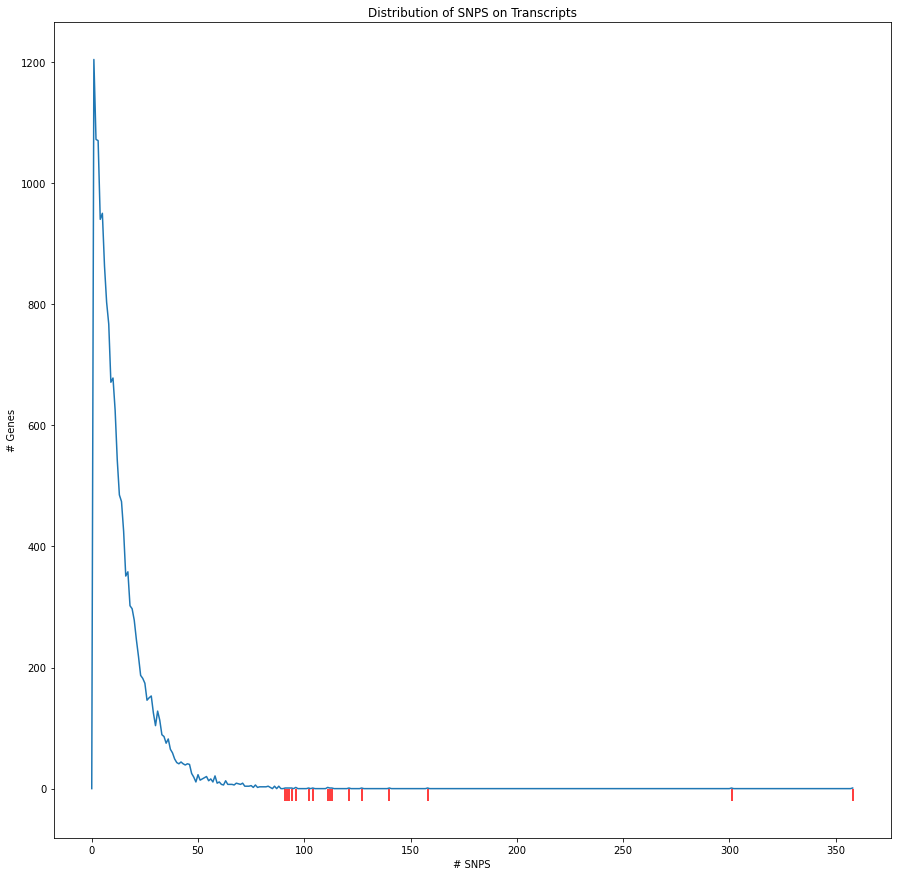

In [32]:
plt.rcParams['figure.figsize'] = [15, 15]

plt.title("Distribution of SNPS on Transcripts")
plt.xlabel("# SNPS")
plt.ylabel("# Genes")
plt.vlines(red_steps, colors="red", ymin = -20, ymax = 0)
plt.plot(histogram_array);